In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

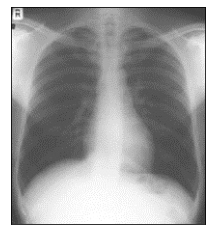

In [3]:
# read an image in grayscale
# cv2.imread()

imgQ1 = cv2.imread('imageQ1.jpg',0)

# show the image (cv2.imshow() or matplotlib --> plt.imshow()..)

# cv2.namedWindow("imageQ_1", cv2.WINDOWS_NORMAL)
#cv2.imshow('imageQ_1',imgQ1)
# plt.imshow(imgQ1,'gray',vmin=0, vmax=255)

# plt.imshow(imgQ1,cmap='gray', interpolation = 'bicubic')
plt.imshow(imgQ1,cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([]) # to hide tick values on x and y
plt.show()

In [4]:
print(np.min(imgQ1))
print(np.max(imgQ1))

61
255


In [5]:
# Question 1
a=0
b=255
c=np.min(imgQ1)
d=np.max(imgQ1)       
img_1_out = (imgQ1 - c)*((b-a)/(d-c)) + a 

In [6]:
print(img_1_out)

[[  6.57216495  34.17525773 143.27319588 ...   7.88659794   7.88659794
    9.20103093]
 [ 11.82989691  28.91752577 144.58762887 ...   9.20103093   7.88659794
    9.20103093]
 [ 27.60309278  32.86082474 120.92783505 ...  11.82989691   7.88659794
    9.20103093]
 ...
 [  6.57216495  36.80412371   9.20103093 ...  10.51546392   9.20103093
    9.20103093]
 [ 10.51546392   7.88659794  10.51546392 ...   6.57216495   9.20103093
    9.20103093]
 [ 10.51546392   6.57216495   9.20103093 ...   7.88659794   9.20103093
    9.20103093]]


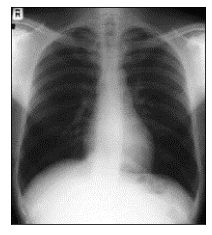

In [7]:
plt.imshow(img_1_out, 'gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([]) # to hide tick values on x and y
plt.show()

In [8]:
# save the image ----cv2.imwrite()
cv2.imwrite('q1_lung_output.png',img_1_out)

# k = cv2.waitKey(0)&0xFF
# if k ==27: # wait for ESC key to exit
#     cv2.destoryAllWindows()
# elif k==ord("s"): # wait for "s" key to save and exit 
#     cv2.imwrite('q1_lung.png',imgQ1)
#     cv2.destoryAllWindows()

True

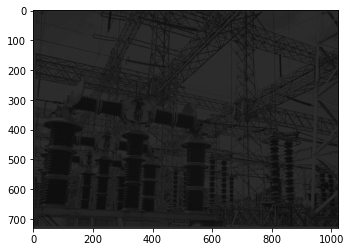

In [9]:
# Question 2.1

# 2.1 compute histogram 
# read image 2.1
img21 = cv2.imread('imageQ21.jpg',0)
plt.imshow(img21,cmap='gray', vmin=0, vmax=255)
# plt.xticks([]), plt.yticks([]) # to hide tick values on x and y
plt.show()

In [10]:
# the method of in-built function 内置函数
# 统计直方图
#1.0# 使用opencv进行统计直方图
    ##1.  cv2.calcHIst(image, channels, mask, histSize, range[,hist[,accumulate]])  # 只有mask没有中括号

hist = cv2.calcHist([img21],[0], None, [256],[0,256])

#2.0# 使用numpy统计直方图

# hist,bins = np.histgoram(img21.ravel(),256,[0,256])  ####img.ravel()将图像转换成一维数组， 这里没有中括号

#np.bincount()运行速度是np.histogram的十倍。 
    #需注意np.bincount() 需要设置minlength=256
        #hist = np.bincount(img.ravel(), minlength=256)
        
# opencv的函数 比 np.histogram()快四十倍


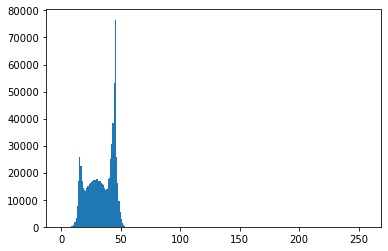

In [11]:
# draw histogram 绘制直方图
# 1. Short Way(simple), 使用Matplotlib 中的绘图函数 matplotlib.pyplot.hist()

plt.hist(img21.ravel(),256,[0,256])
plt.show()

# 2. Long Way (complex), 使用OpenCV 的绘图函数

730 1024


<BarContainer object of 256 artists>

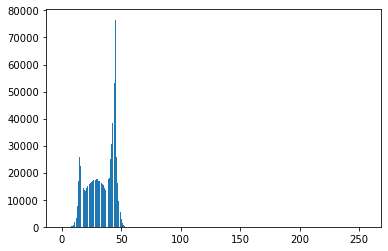

In [12]:
###不使用内置函数的直方图统计
## 方法1
row, column = img21.shape
print(row, column)
gray_level = [0 for x in range(0,256)]
# print(gray_level)

for r in range(row):
    for col in range(column):
        # 逐个像素扫描，并统计
        gray_level[img21[r,col]] +=1
#         print(img21[r,col])
# print(gray_level)
plt.bar(x=range(0,256), height = gray_level)



<BarContainer object of 256 artists>

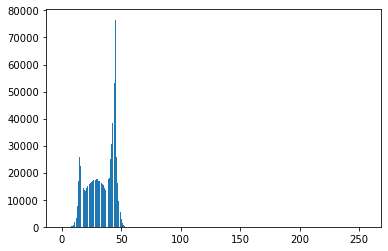

In [41]:
## 方法2: 利用字典统计gray_levels
row, column = img21.shape
dict ={}
for i in range(0,256):
    dict[i]=0
    
for i in range(0,256):
    for r in range(row):
        for col in range(column):
            if img21[r,col] == i:
                dict[i] +=1
values = list(dict.values())
plt.bar(x=range(0,256), height = values)

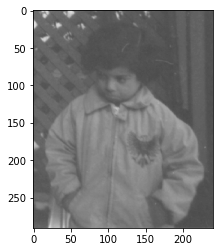

In [42]:
# Question2.2 histogram equalization

img22 = cv2.imread('imageQ22.tif',0)
plt.imshow(img22,cmap='gray', vmin=0, vmax=255)
# plt.xticks([]), plt.yticks([]) # to hide tick values on x and y
plt.show()

291 240


<BarContainer object of 256 artists>

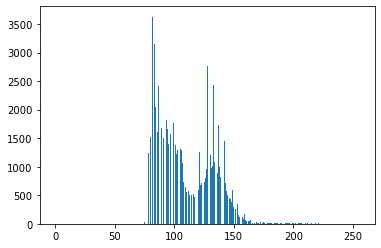

In [43]:
row, column = img22.shape
print(row, column)
gray_level_2 = [0 for x in range(0,256)]
# print(gray_level)

for r in range(row):
    for col in range(column):
        # 逐个像素扫描，并统计
        gray_level_2[img22[r,col]] +=1
#         print(img21[r,col])
# print(gray_level)
plt.bar(x=range(0,256), height = gray_level_2)


<BarContainer object of 256 artists>

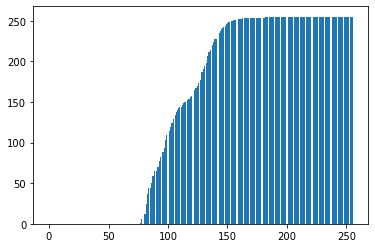

In [44]:
# 归一化
pixel_number = img22.size
#  MN
#  pixel_number = row*column 
#  print(pixel_number)

p = [0 for x in range(0,256)]
for i in range(0,256):
    p[i] = 255* gray_level_2[i]/pixel_number

# 计算累积直方图 
c_k = [0 for x in range(0,256)]
c_k[0]=p[0]
for i in range (1,256):
    c_k[i]= c_k[i-1] + p[i]
plt.bar(x=range(0,256), height = c_k)


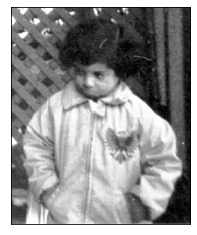

In [45]:
# 计算新的像素的值
new_img22 = copy.deepcopy(img22)
# deepcopy 不会修改原图img22的值，因为python本身是内存索引制
# plt.imshow(new_img22,cmap='gray', vmin=0, vmax=255)
# plt.show()
for r in range(row):
    for c in range(column):
        index = int(img22[r,c])
        
        new_img22[r,c]=c_k[index]
plt.imshow(new_img22,cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([]) # to hide tick values on x and y
plt.show()

<BarContainer object of 256 artists>

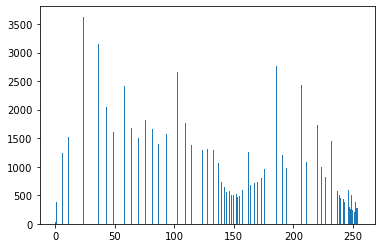

In [46]:
# 新图的直方图分布
gray_level_new = [0 for x in range(0,256) ]
for r in range(row):
    for c in range(column):
        gray_level_new[new_img22[r,c]]+=1
plt.bar(x=range(0,256), height = gray_level_new)


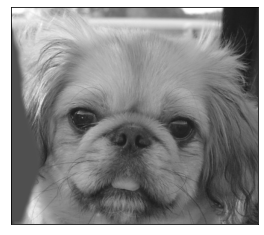

In [47]:
# Question3
img3 = cv2.imread('imageQ3.jpg',0)

plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])

plt.show()

(Text(0.5, 1.0, 'sobel_x_y'), ([], []), ([], []))

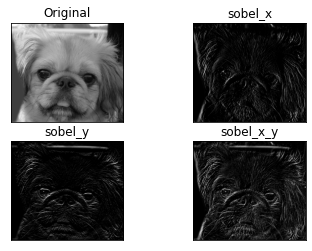

In [48]:
# 第一种解法
s_x = np.array([[-1,0,1],
                [-2,0,2],
                [-1,0,1]])
s_y = np.array([[-1,-2,-1],
                [0,0,0],
                [1,2,1]])

sobel_x = cv2.filter2D(img3, -1, s_x)
# #这里的-1，表示的是保持和原图一样的数据类型
sobel_y = cv2.filter2D(img3, -1, s_y)

sobel_x_y = sobel_x + sobel_y

plt.subplot(2,2,1),plt.imshow(img3,cmap = 'gray')
plt.title("Original"),plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(sobel_x,cmap = 'gray')
plt.title("sobel_x"),plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobel_y,cmap = 'gray')
plt.title("sobel_y"),plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobel_x_y,cmap = 'gray')
plt.title("sobel_x_y"),plt.xticks([]), plt.yticks([])




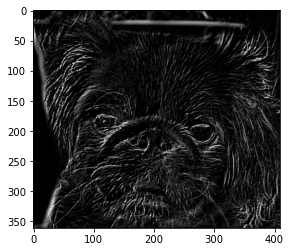

In [49]:
plt.imshow(sobel_x_y,cmap = 'gray',vmin=0,vmax=255)

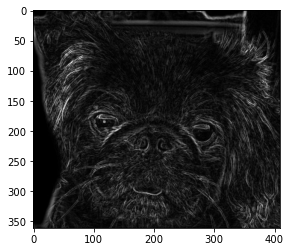

In [50]:
# 第二种解法

 #这里的cv2.CV_16S指的就是数据类型。还有很多别的，相比unit8是不带符号
# cv2.CV_64F 输出图像的深度（数据类型）,可以使用-1，与原图保持一致np.uint8
x = cv2.Sobel(img3,cv2.CV_16S,1,0)
y = cv2.Sobel(img3,cv2.CV_16S,0,1)

absX = cv2.convertScaleAbs(x) # 转回uint8
absY = cv2.convertScaleAbs(y) # 转回uint8
dst = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
plt.imshow(dst, 'gray', vmin=0, vmax=255)
#可以看到效果要比上面分开来显示要好一些，因为多了上述合成的这一步，会增加一些部位的幅值。

(Text(0.5, 1.0, 'laplacian'), ([], []), ([], []))

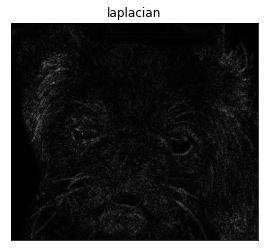

In [51]:
## Laplacian 算子



laplacian = cv2.Laplacian(img3,cv2.CV_16S)
a = cv2.convertScaleAbs(laplacian)

plt.imshow(a, 'gray', vmin=0, vmax=255)
plt.title("laplacian"),plt.xticks([]), plt.yticks([])

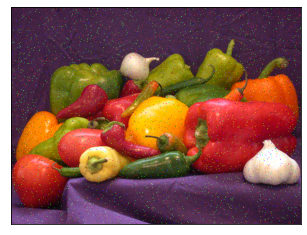

In [52]:
# Question4_1
img41 = cv2.imread('imageQ41.png') # 这里读的是彩图
img41_rgb = cv2.cvtColor(img41, cv2.COLOR_BGR2RGB) # 这里cv2.COLOR_BGR2RGB就是一种转换形式
plt.imshow(img41_rgb)
plt.xticks([]), plt.yticks([])
plt.show()

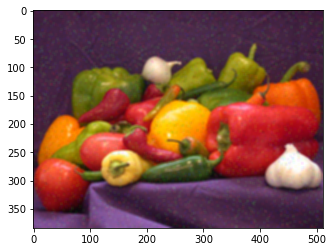

In [53]:
# Mean filter （使用 cv2.blur() 和 cv2.boxFilter()）
#  这是一个5x5的平均滤波器核
mean_img41_rgb = cv2.blur(img41_rgb,(5,5)) 
#  #调整kernel size会改变图片的模糊程度
plt.imshow(mean_img41_rgb)

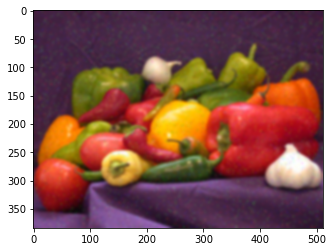

In [54]:
##########方法：  2D 卷积 
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(mean_img41_rgb,-1,kernel)
plt.imshow(dst)

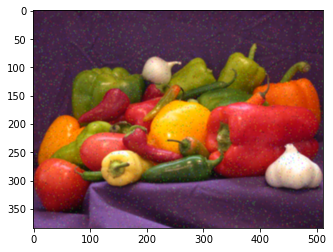

In [55]:
#1.1Gaussian filter _Blur （实现函数cv2.GaussianBlur(），或者使用cv2.getGaussianKernel() 自己构建一个高斯核

gaussian_img41_rgb = cv2.GaussianBlur(img41_rgb, (3,3), 5) # 0 是指根据窗口大小（5，5）来计算高斯函数标准差
plt.imshow(gaussian_img41_rgb)
#可以调整kernel size 和最后的模糊系数来改变图片的模糊程度

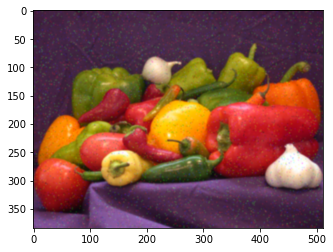

In [56]:
#1.2Gaussian filter _Blur （实现函数cv2.GaussianBlur(），或者使用cv2.getGaussianKernel() 自己构建一个高斯核

gaussian_img41_rgb = cv2.GaussianBlur(img41_rgb, (5,5), 0) # 0 是指根据窗口大小（5，5）来计算高斯函数标准差
plt.imshow(gaussian_img41_rgb)
#可以调整kernel size 和最后的模糊系数来改变图片的模糊程度

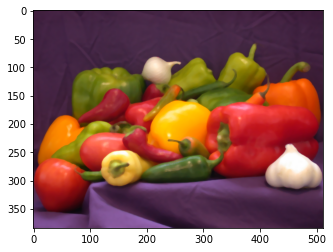

In [29]:
# Median Filter_blur 
#这里的kernel size只需要给常数，不需要给tuple。 由于图片没有什么胡椒盐噪声。所以只有模糊的效果
median_img41_rgb = cv2.medianBlur(img41_rgb, 5)
plt.imshow(median_img41_rgb)

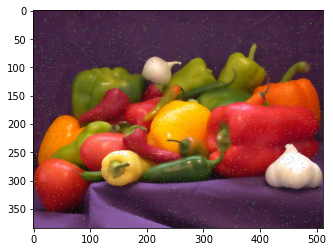

In [30]:
# 双边滤波 实现函数 cv2.bilateralFilter()
bilateral_img41_rgb = cv2.bilateralFilter(img41_rgb, 9, 75,75)
# 9 领域直径，两个75分别是空间高斯函数标准差，灰度值相似性高斯函数标准差
plt.imshow(bilateral_img41_rgb)

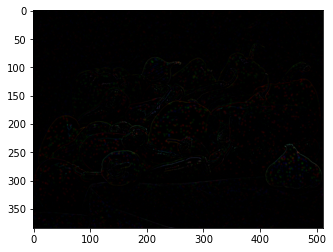

In [31]:
# question4-2
# HIGH -pass Filtered image
img42 = cv2.imread('imageQ42.png') # 这里读的是彩图
img42_rgb = cv2.cvtColor(img42, cv2.COLOR_BGR2RGB) # 这里cv2.COLOR_BGR2RGB就是一种转换形式
mask = cv2.subtract(img42_rgb, gaussian_img41_rgb )
plt.imshow(mask)

# cv2.subtract
# output = img + alpha * mask

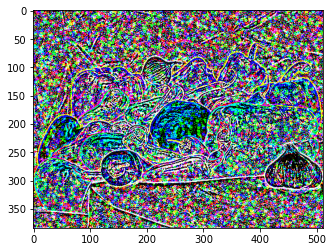

In [32]:
# 如果不用cv2.subtract
mask_test = img41_rgb - gaussian_img41_rgb
plt.imshow(mask_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


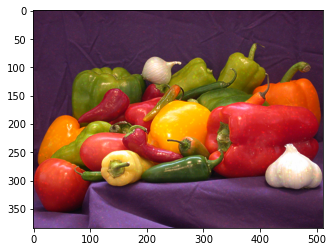

In [33]:
output_img42 =  (img42_rgb + 1.3 * mask) / 255
#如图不/255，接.astype('uint8')也会导致回滚。因为用的是普通的加法
# image + a*(H = I- image*Gaussian)
plt.imshow(output_img42)
#用cv2.addweighted也是可以的。

(Text(0.5, 1.0, 'sharpenin_img5'), ([], []), ([], []))

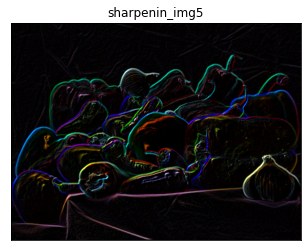

In [34]:
#  using  sobel 
s_x = np.array([[-1,0,1],
                [-2,0,2],
                [-1,0,1]])
s_y = np.array([[-1,-2,-1],
                [0,0,0],
                [1,2,1]])

sobel_x = cv2.filter2D(img42, -1, s_x)
# #这里的-1，表示的是保持和原图一样的数据类型
sobel_y = cv2.filter2D(img42, -1, s_y)

sharpenin_img5 = dst = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

plt.imshow(sharpenin_img5, cmap = 'gray', vmin=0,vmax=255)
plt.title("sharpenin_img5"),plt.xticks([]), plt.yticks([])

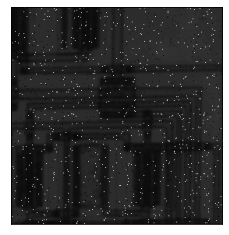

In [35]:
# Question5

img5 = cv2.imread("imageQ5.png",0)
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

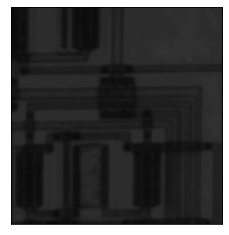

In [36]:
# 5.1 去噪，进行去除胡椒盐噪声的操作
median_img5 = cv2.medianBlur(img5,5)
plt.imshow(median_img5, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

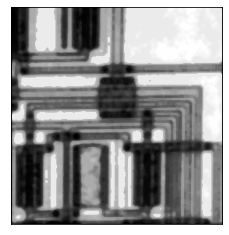

In [37]:
# 5.2 进行直方图均衡，提升对比度
row_5, col_5 = median_img5.shape
#print(row_5, col_5)
gray_level_5 = [0 for x in range(0, 256)] 
#这里开0到256，是因为range本身是左闭右开的空间
for r in range(row_5):
    for c in range(col_5): 
        # 逐个像素扫描，并统计
        gray_level_5[median_img5[r,c]] += 1
        
# # 归一化normalization
pixel_number_5 = img5.size # = row_5 * col_5 = MN
p_5 = [0 for x in range(0, 256)]
# 求出Pk的各个值，
for i in range(0, 256):
    p_5[i] = gray_level_5[i] / pixel_number_5
    
# 计算累计直方图
# 求各个Sk的值

s_p_5 = [0 for x in range(0, 256)]
s_p_5[0] = p_5[0]
for i in range(1, 256):
    s_p_5[i] = s_p_5[i-1] + p_5[i]
    
# 计算新像素的值
new_img_5 = copy.deepcopy(median_img5) 
for r in range(row_5):
    for c in range(col_5):
        index_5 = int(median_img5[r,c])
        new_img_5[r,c] = 255 * s_p_5[index_5]

plt.imshow(new_img_5, 'gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

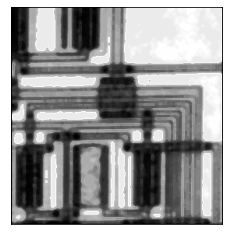

In [38]:
# 5.3 进行锐化的步骤

gaussian_img5 = cv2.GaussianBlur(new_img_5, (3,3), 5) 
mask_5 = cv2.subtract(new_img_5, gaussian_img5)
output_img5 = cv2.addWeighted(new_img_5, 1, mask_5, 1.4, 0)
plt.imshow(output_img5, 'gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()


In [39]:
# # 5.4 对比度拉伸
print(np.min(output_img5))
print(np.max(output_img5))

0
255


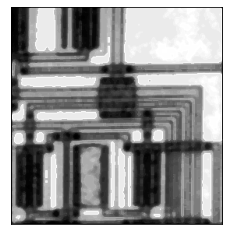

In [40]:
#规范起见 依然执行一下
a_5, b_5 = 0., 255.
c_5, d_5 = np.min(output_img5), np.max(output_img5)
img_O_5 = (output_img5 - c_5) * ((b_5-a_5) / (d_5-c_5)) + a_5

plt.imshow(img_O_5, 'gray',vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

In [138]:
cv2.imwrite('q5output.png',img_O_5)

True